In [341]:
#Importing necessary libraries

import numpy as np
import pandas as pd
from kmodes.kmodes import KModes
import matplotlib.pyplot as plt
%matplotlib inline

## Cleaning

In [342]:
#Importing database in pandas

filepath = "Users.csv"
df = pd.read_csv(filepath, sep = ';')
df.head(5)

,Profile Name,Type of Profile,Access Actionable Relationship Center for partner users,Access Activities,Access Custom Mobile Apps,Access drag-and-drop content builder,Access Event Monitoring Analytics Templates and Apps,Access Experience Management,Access Libraries,Access to view Data Assessment,...,View Private Static Resources,View Real-Time Event Monitoring Data,View Reports in Public Folders,View Restriction and Scoping Rules,View Roles and Role Hierarchy,View Setup and Configuration,View Threat Detection Events,View Trust Measures,Waive Multi-Factor Authentication for Exempt Users,Weekly Data Export
0,Analytics Cloud Integration User,Standard,0,1,0,0,0,0,0,0,...,0,1,1,0,1,1,0,0,0,0
1,Analytics Cloud Security User,Standard,0,0,0,0,0,0,0,0,...,0,1,0,0,1,1,0,0,0,0
2,ARI Marketing User,Custom,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,ARIZA - Manager,Custom,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,ARIZA - Standard User,Custom,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


We can see there are 58 Profiles and 295 different types of access.

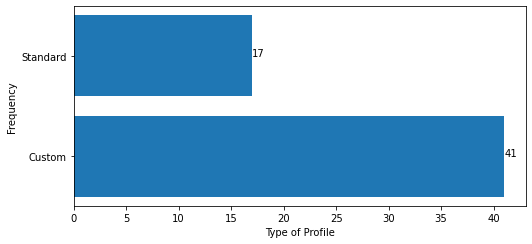

In [343]:
#Setting up Graph

plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

y = df['Type of Profile'].value_counts().tolist()
x = df['Type of Profile'].value_counts().index.tolist()

plt.barh(x, y)
 
for index, value in enumerate(y):
    plt.text(value, index,
             str(value))

# Custom Axis Title
plt.xlabel('Type of Profile', horizontalalignment='center')
plt.ylabel('Frequency', horizontalalignment='center')
    
plt.show()

Of the 58 Profiles, 41 are Custom Profiles and 17 are standard. We can delete the Standard ones as they are not part of the analysis.

In [344]:
#Dropping standard profiles

df = df[df["Type of Profile"] != "Standard"]

#Dropping "Type of Profile" column

df.drop('Type of Profile', axis=1, inplace=True)

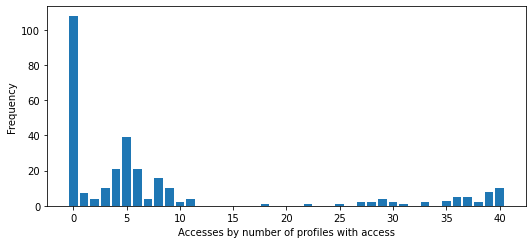

In [345]:
#Get summatory of values in every column, a metric that corresponds to the count of profiles with a particular access
sum_columns = df.sum(numeric_only=True)
#Setting up Graph

plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

y = sum_columns.value_counts().tolist()
x = sum_columns.value_counts().index.tolist()

plt.bar(x, y)

# Custom Axis Title
plt.xlabel('Accesses by number of profiles with access', horizontalalignment='center')
plt.ylabel('Frequency', horizontalalignment='center')
    
plt.show()

We can see that over a hundred accesses have no custom profiles with access to them. We can delete these acceses as they are of no importance for the analysis

In [346]:
#Make a list of all access that no profile has access (that is, the summatory is 0)

blank_columns = sum_columns.loc[sum_columns == 0].index.tolist()

#Drop all columns that were on the no access list

df = df.drop(columns = blank_columns)

# Add new Index column index with default index
df['Index'] = list(range(len(df.index)))

df.set_index(['Index'], inplace = True)

df

,Profile Name,Access Activities,Access Experience Management,Access Libraries,Activate Contracts,Add People to Direct Messages,Allow access to all Pardot features,Allow Access to Customized Actions,Allow Inclusion of Code Snippets from UI,Allow sending of List Emails,...,View Health Check,View Help Link,View Login Forensics Events,View My Team's Dashboards,View Real-Time Event Monitoring Data,View Reports in Public Folders,View Roles and Role Hierarchy,View Setup and Configuration,Waive Multi-Factor Authentication for Exempt Users,Weekly Data Export
Index,,,,,,,,,,,,,,,,,,,,,
0,ARI Marketing User,1,0,0,0,0,0,1,0,1,...,0,1,0,0,0,0,1,0,0,0
1,ARIZA - Manager,1,0,0,0,0,0,1,0,1,...,0,1,0,0,0,0,1,0,0,0
2,ARIZA - Standard User,1,0,0,0,0,0,1,0,1,...,0,1,0,0,0,0,1,0,0,0
3,B2BMA Integration User,1,0,0,0,0,1,1,0,0,...,0,0,1,0,1,1,1,1,0,0
4,CA - BDR Team,1,0,0,0,0,0,1,0,1,...,0,1,0,0,0,0,1,1,0,0
5,CA - DM Sales and Directors of New Business De...,1,0,0,0,0,0,1,0,1,...,0,1,0,0,0,0,1,0,0,0
6,CA - VP Sales,1,0,0,0,0,0,1,0,1,...,0,1,0,1,0,0,1,0,0,0
7,DE - Manager,1,0,0,0,0,0,1,0,1,...,0,1,0,0,0,1,1,0,0,0
8,German Users,1,0,0,0,0,0,1,0,1,...,0,1,0,0,0,1,1,0,0,0


The cleaned up dataframe has 41 Profiles and 186 accesses

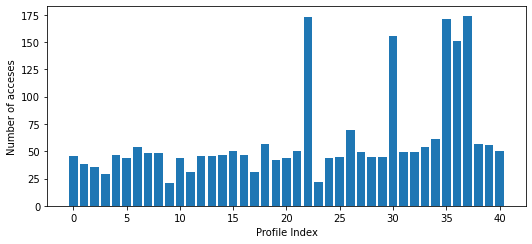

In [347]:
#Get summatory of values in every row, a metric that corresponds to the count of profiles with a particular access
sum_rows = df.sum(numeric_only=True, axis = 1)
#Setting up Graph

plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

y = sum_rows.tolist()
x = sum_rows.index.tolist()

plt.bar(x, y)

# Custom Axis Title
plt.xlabel('Profile Index', horizontalalignment='center')
plt.ylabel('Number of acceses', horizontalalignment='center')
    
plt.show()

In [290]:
sum_rows.describe()

count     41.000000
mean      60.146341
std       40.775949
min       21.000000
25%       44.000000
50%       47.000000
75%       54.000000
max      174.000000
dtype: float64

The above graph shows the number of acceses that each of the Profiles have. Below the graph we can see that the mean count of accesses is 60 but the median es 47, with 75% of the values below 54. This discrepancy is explained by 5 groups which have way more accesses than the rest as it can be seen in the graph.

## Clustering

Due to the sheer amount of data we have, an algorithm called K-mode will be used. This is a clustering algorithm specifically designed for categorical, non continual data, which means, data that can't be plotted on a continuous line (the values one and zero in our case depict a True or False statement, not real numbers). We have to feed it the amount of groups it needs to group the data in and it finds the most similar profiles and groups them.

To determine the optimal number of groups we plot an elbow graph, where we graph the cost by function of the number of clusters (the less costly, the better, as it means the groups are more homogeneous). We run the risk of overfitting if we increase the number of clusters too much (that is, adding groups that are not useful,  having only one ocurrence for example. The elbow method consists on selecting the point where the curve bend so that the adding another cluster is not worth t in terms of cost

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 1098.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 1098.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 0, cost: 1098.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 0, cost: 1098.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 0, cost: 1098.0
Best run was number 1
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 1013.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 3, cost: 555.0
Run 2, iteration: 2/100, moves: 0, cost: 555.0
Init: initializing centroids
Init: i

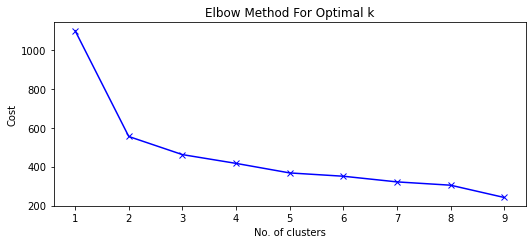

In [291]:
# Elbow curve to find optimal K
cost = []
K = range(1,10)
for num_clusters in list(K):
    kmode = KModes(n_clusters=num_clusters, init = "random", n_init = 5, verbose=1)
    kmode.fit_predict(df)
    cost.append(kmode.cost_)
    
plt.plot(K, cost, 'bx-')
plt.xlabel('No. of clusters')
plt.ylabel('Cost')
plt.title('Elbow Method For Optimal k')
plt.show()

We can see that at 3, a further increase in the number of clusters will only give us a marginally better result, so we select 3 clusters and we run the algorithm.

In [292]:
# Building the model with the selected number of clusters
kmode = KModes(n_clusters=3, init = "random", n_init = 5, verbose=1)
clusters = kmode.fit_predict(df)



Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 4, cost: 953.0
Run 1, iteration: 2/100, moves: 0, cost: 953.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 8, cost: 967.0
Run 2, iteration: 2/100, moves: 0, cost: 967.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 2, cost: 1015.0
Run 3, iteration: 2/100, moves: 0, cost: 1015.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 8, cost: 467.0
Run 4, iteration: 2/100, moves: 3, cost: 462.0
Run 4, iteration: 3/100, moves: 0, cost: 462.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 6, cost: 953.0
Run 5, iteration: 2/100, moves: 0, cost: 953.0
Best run was number 4


The clusters are then inserted in the final dataframe

In [293]:
df.insert(0, "Cluster", clusters, True)
df.head(5)


,Cluster,Profile Name,Access Activities,Access Experience Management,Access Libraries,Activate Contracts,Add People to Direct Messages,Allow access to all Pardot features,Allow Access to Customized Actions,Allow Inclusion of Code Snippets from UI,...,View Health Check,View Help Link,View Login Forensics Events,View My Team's Dashboards,View Real-Time Event Monitoring Data,View Reports in Public Folders,View Roles and Role Hierarchy,View Setup and Configuration,Waive Multi-Factor Authentication for Exempt Users,Weekly Data Export
Index,,,,,,,,,,,,,,,,,,,,,
0,1,ARI Marketing User,1,0,0,0,0,0,1,0,...,0,1,0,0,0,0,1,0,0,0
1,1,ARIZA - Manager,1,0,0,0,0,0,1,0,...,0,1,0,0,0,0,1,0,0,0
2,1,ARIZA - Standard User,1,0,0,0,0,0,1,0,...,0,1,0,0,0,0,1,0,0,0
3,0,B2BMA Integration User,1,0,0,0,0,1,1,0,...,0,0,1,0,1,1,1,1,0,0
4,1,CA - BDR Team,1,0,0,0,0,0,1,0,...,0,1,0,0,0,0,1,1,0,0


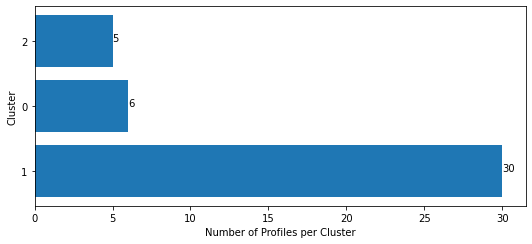

In [294]:
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

y = df['Cluster'].value_counts().tolist()
x = df['Cluster'].value_counts().index.tolist()
x = list(map(str, x))



plt.barh(x, y)
 
for index, value in enumerate(y):
    plt.text(value, index,
             str(value))

# Custom Axis Title
plt.xlabel('Number of Profiles per Cluster', horizontalalignment='center')
plt.ylabel('Cluster', horizontalalignment='center')



plt.show()

As we can see, more than half of the profiles are part of cluster 0, the rest divided in the other three clusters

Finally it is exported as an excel file

In [295]:
#Determining the name of the file
file_name = '/home/gabriel/Desktop/Projects/Group Consolidation/Clustered_profiles.xlsx'
  
#Saving the Excel
df.to_excel(file_name)
print('DataFrame is written to Excel File successfully.')

DataFrame is written to Excel File successfully.


## Testing

To make sure the algorithm did it's job we are going to test the first row against the others in the dataframe by comparing tha amount of matches. If the algorithm is correct, then the matches in its own clusters should clearly outnumber the ones in the other clusters.

In [296]:

#define col_list as a list of all DataFrame column names
col_list= list(df)

#remove the column 'rating' from the list
col_list.remove('Cluster')
col_list.remove('Profile Name')

#define new DataFrame column as sum of rows in col_list 
df['Number of acceses'] = df[col_list].sum(axis=1)

# Sorting by column "Number of accesses"
df = df.sort_values(by=['Number of acceses'], ascending=True)



In [297]:
#Turn the Database into a list

access_list = df.values.tolist()

print('Our sample to test is',access_list[0][1],'in cluster', access_list[0][0])

Our sample to test is Identity User Non-SSO in cluster 0


The following block of code iterates through the list comparing the values of the first profile with itself
and all the other profiles. It counts the instances where there is a match and adds
it to a list.


In [298]:
number_matches = []
for i in range (1, len(access_list)):
    count_matches = 0
    for j in range (2, len(access_list[0])):    
                    if access_list[0][j] == access_list[i][j]:
                        count_matches = count_matches + 1
    number_matches.append([access_list[i][0],count_matches])

The following graph shows that the cluster that has the highest mean degree of similarity is the same cluster as the sample.

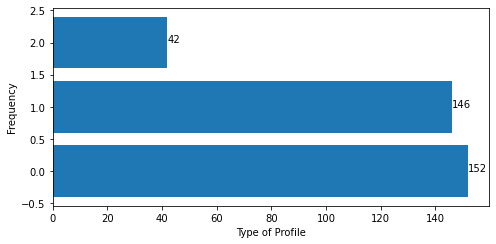

In [299]:
matches = pd.DataFrame(number_matches, columns =['Cluster', 'Number of Matches'])

y = []
x = []
for cluster in range (0,3):
    cluster_matches = matches.loc[matches['Cluster'] == cluster]
    mean = cluster_matches.mean()
    y.append(int(mean[1]))
    x.append(mean[0])

plt.rcParams["figure.figsize"] = [7, 3.50]
plt.rcParams["figure.autolayout"] = True
    
plt.barh(x, y)
 
for index, value in enumerate(y):
    plt.text(value, index,
             str(value))

# Custom Axis Title
plt.xlabel('Type of Profile', horizontalalignment='center')
plt.ylabel('Frequency', horizontalalignment='center')
    
plt.show()


## Dimensionality Reduction

This block of code iterates first through each of the clusters, taking the first ocurrence and selecting it as the base profile. Remembering that the dataframe was sorted by number of acceses, which means the first ocurrence is  the one with the least amount of accesses. Then it compares the acceses in this base profile with the others in the cluster, and if a profile has an access that is not on the base profile it appends the name of the profile, the cluster and the access as an item in a list 

In [300]:
base_profile = []
custom_accesses = []
for cluster in range (0,3):
    cluster_df = df.loc[df['Cluster'] == cluster]
    cluster_list = cluster_df.values.tolist()
    base_profile.append(cluster_list[0][1])
    for i in range (1, len(cluster_list)):
        for j in range (2, len(cluster_list[0])):    
                        if cluster_list[0][j] != cluster_list[i][j]:
                            custom_accesses.append([cluster_list[i][1],cluster_list[i][0],cluster_df.columns[j]])

A Dataframe with the base Profiles and it's acceses will be created

In [312]:
#Create Base Profiles dataframe and export it as Excel file.

base_profiles = df.loc[df['Profile Name'].isin(base_profile)].sort_values(by=['Cluster'], ascending=True)

# Add new Index column index with default index
base_profiles['Index'] = list(range(len(base_profiles.index)))

base_profiles.set_index(['Index'], inplace = True)

#Determining the name of the file
file_name = '/home/gabriel/Desktop/Projects/Group Consolidation/Base Profiles.xlsx'
  
#Saving the Excel
base_profiles.to_excel(file_name)
print('DataFrame is written to Excel File successfully.')

DataFrame is written to Excel File successfully.


A dataframe with all the custom accesses that non-base profiles have will be created

In [314]:
custom_access = pd.DataFrame(custom_accesses, columns =['Profile Name', 'Cluster', 'Custom Access'])

# Add new Index column index with default index
custom_access['Index'] = list(range(len(custom_access.index)))

custom_access.set_index(['Index'], inplace = True)

#Determining the name of the file
file_name = '/home/gabriel/Desktop/Projects/Group Consolidation/Custom acceses.xlsx'
  
#Saving the Excel
custom_access.to_excel(file_name)
print('DataFrame is written to Excel File successfully.')

DataFrame is written to Excel File successfully.


In [315]:
base_profiles

,Cluster,Profile Name,Access Activities,Access Experience Management,Access Libraries,Activate Contracts,Add People to Direct Messages,Allow access to all Pardot features,Allow Access to Customized Actions,Allow Inclusion of Code Snippets from UI,...,View Help Link,View Login Forensics Events,View My Team's Dashboards,View Real-Time Event Monitoring Data,View Reports in Public Folders,View Roles and Role Hierarchy,View Setup and Configuration,Waive Multi-Factor Authentication for Exempt Users,Weekly Data Export,Number of acceses
Index,,,,,,,,,,,,,,,,,,,,,
0,0,Identity User Non-SSO,0,0,1,0,1,0,1,0,...,1,0,0,0,0,0,0,0,0,21
1,1,ARIZA - Standard User,1,0,0,0,0,0,1,0,...,1,0,0,0,0,1,0,0,0,36
2,2,US - System Admin - Pardot Connector,1,1,1,0,1,0,1,1,...,1,1,1,1,1,1,1,1,1,151


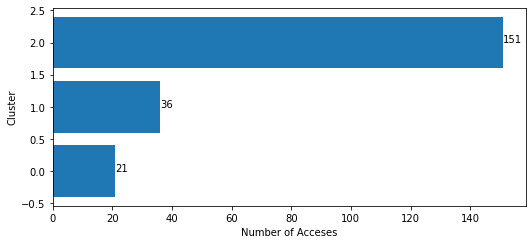

In [326]:
number_of_accesses = base_profiles['Number of acceses']
#Setting up Graph

plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

y = number_of_accesses.tolist()
x = number_of_accesses.index.tolist()

plt.barh(x, y)
 
for index, value in enumerate(y):
    plt.text(value, index,
             str(value))

# Custom Axis Title
plt.xlabel('Number of Acceses', horizontalalignment='center')
plt.ylabel('Cluster', horizontalalignment='center')
    
plt.show()

We can see that cluster 2 base profile has 151 access, way more than clusters 0 and 1.

In [308]:
custom_access

,Profile Name,Cluster,Custom Access
0,US - Holman Parts - Read Only,0,Access Activities
1,US - Holman Parts - Read Only,0,Access Libraries
2,US - Holman Parts - Read Only,0,Add People to Direct Messages
3,US - Holman Parts - Read Only,0,Allow Access to Customized Actions
4,US - Holman Parts - Read Only,0,Allow View Knowledge
...,...,...,...
738,US - System Admin with SSO,2,Upload AppExchange Packages
739,US - System Admin with SSO,2,View All Data
740,US - System Admin with SSO,2,View Encrypted Data
741,US - System Admin with SSO,2,Waive Multi-Factor Authentication for Exempt U...


In [335]:
count_profiles = custom_access['Profile Name'].nunique()

count_access = custom_access['Profile Name'].count()

print('The mean number of custom acceses per profile is', count_access/count_profiles)

The mean number of custom acceses per profile is 19.55263157894737


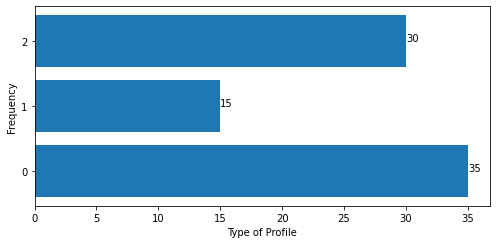

In [338]:
y = []
x = []
for cluster in range (0,3):
    cluster_df = custom_access.loc[custom_access['Cluster'] == cluster]
    count_profiles = cluster_df['Profile Name'].nunique()
    count_access = cluster_df['Profile Name'].count()
    
    y.append(int(count_access/count_profiles))
    x.append(str(cluster))

plt.rcParams["figure.figsize"] = [7, 3.50]
plt.rcParams["figure.autolayout"] = True
    
plt.barh(x, y)
 
for index, value in enumerate(y):
    plt.text(value, index,
             str(value))

# Custom Axis Title
plt.xlabel('Type of Profile', horizontalalignment='center')
plt.ylabel('Frequency', horizontalalignment='center')
    
plt.show()

The graph show the average number of custom acceses per cluster